In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## Part 1

best k:20


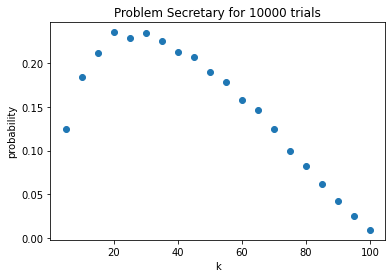

In [ ]:
#@title Q1.
probs = np.zeros(len(range(5,101,5)))
itr = 0
for k in range(5,101,5):
  count = 0
  for i in range(10000):
    secretaries = np.random.choice(100,100)
    first_k_max = np.max(secretaries[:k])
    if(np.sum((secretaries[k:]>first_k_max).astype(int)) != 0):
      idx = np.argwhere(secretaries[k:] > np.max(secretaries[:k]))[0,0] + k
    if(secretaries[idx] == 99):
      count += 1
  probs[itr] = count / 10000  
  itr += 1

plt.title("Problem Secretary for 10000 trials")
plt.scatter(range(5,101,5),probs)
plt.xlabel("k")
plt.ylabel("probability")

print(f"best k:{5*np.argmax(probs) + 5}")

best k:3


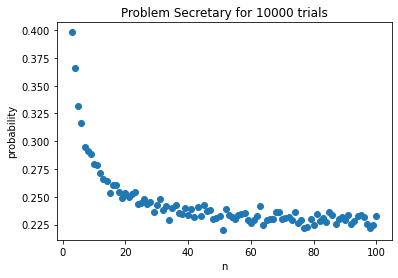

In [ ]:
#@title Q2.

probs = np.zeros(len(range(3,101)))
itr = 0
for n in range(3,101):
  count = 0
  k = int(np.round(n/np.exp(1)))
  for i in range(10000):
    secretaries = np.random.choice(n+1,n+1)
    first_k_max = np.max(secretaries[:k])
    if(np.sum((secretaries[k:]>first_k_max).astype(int)) != 0):
      idx = np.argwhere(secretaries[k:] > np.max(secretaries[:k]))[0,0] + k
    if(secretaries[idx] == n):
      count += 1
  probs[itr] = count / 10000  
  itr += 1

plt.title("Problem Secretary for 10000 trials")
plt.scatter(range(3,101),probs)
plt.xlabel("n")
plt.ylabel("probability")

print(f"best k:{np.argmax(probs)+3}")

## Part 2

In [2]:
import numpy as np

def Distribution(stdNum):
    np.random.seed(1)
    popSize = 1000 

    a1 = stdNum - int(stdNum / 10) * 10
    a2 = int((stdNum - int(stdNum / 100) * 100)/10)
    a3 = int(stdNum / 100)

    
    mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
    mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
    mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)


    distributions = [
    {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
    {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
    {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
    ]
    coefficients = np.array([0.4, 0.25, 0.35])
    coefficients /= coefficients.sum()
    popSize = 100000


    num_distr = len(distributions)
    data = np.zeros((popSize, num_distr))
    for idx, distr in enumerate(distributions):
        data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
    random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
    Population = data[np.arange(popSize), random_idx]

    return Population

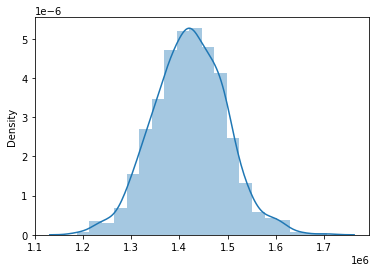

In [3]:
stdNum = 810198367
n = 1000
s = 1000
population_means = np.zeros(s)
population = Distribution(stdNum)
for i in range(s):
  selected_population = np.random.choice(population,n)
  population_means[i] = np.mean(selected_population)
sns.distplot(population_means, 20)

mean:  2.6116853932584267
variance:  0.501254462820351


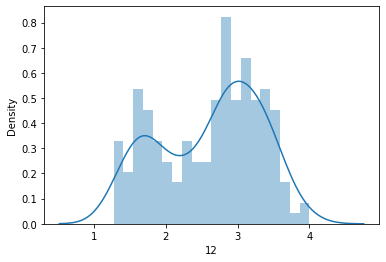

In [7]:
df = pd.read_csv("wine.csv")['12']
sns.distplot(df, bins = 20)
mean = np.mean(df)
var = np.var(df)
print("mean: ",mean)
print("variance: ",var)

n = 10
clt mean = 2.61
clt variance = 0.0501
mean = 2.62
variance = 0.0481


n = 20
clt mean = 2.61
clt variance = 0.0251
mean = 2.61
variance = 0.0245


n = 25
clt mean = 2.61
clt variance = 0.0201
mean = 2.62
variance = 0.0196


n = 50
clt mean = 2.61
clt variance = 0.01
mean = 2.61
variance = 0.0104


n = 75
clt mean = 2.61
clt variance = 0.0067
mean = 2.62
variance = 0.0065


n = 100
clt mean = 2.61
clt variance = 0.005
mean = 2.61
variance = 0.0047


n = 125
clt mean = 2.61
clt variance = 0.004
mean = 2.62
variance = 0.004


n = 150
clt mean = 2.61
clt variance = 0.0033
mean = 2.61
variance = 0.0034




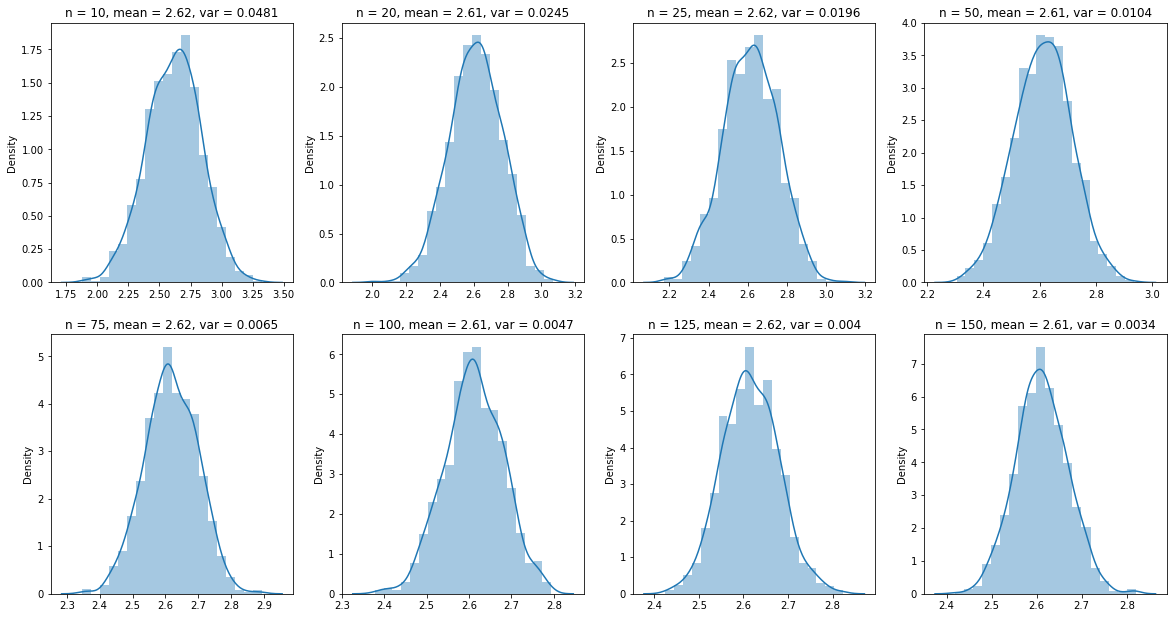

In [12]:
population_means = np.zeros(s)
ns = [10,20,25,50,75,100,125,150]
plt.figure(figsize=(20, 10.5)) 
x = 0
for n in ns:
  for i in range(s):
    selected_population = np.random.choice(df,n)
    population_means[i] = np.mean(selected_population)
  plt.subplot(2, 4, x+1)
  sns.distplot(population_means, 20)
  plt.title(f'n = {n}, mean = {np.round(np.mean(population_means),2)}, var = {np.round(np.var(population_means),4)}')
  print(f"n = {n}")
  print(f"clt mean = {np.round(mean,2)}")
  print(f"clt variance = {np.round(var/n,4)}")
  print(f"mean = {np.round(np.mean(population_means),2)}")
  print(f"variance = {np.round(np.var(population_means),4)}")
  print("\n")
  x += 1